# ECE421 Assignment 1: Linear and Logistic Regression

### Group Members
1. Low Weng Fei (1005644705)
2. Hema Rajesh Nadella (1005324837)

---

## 1.    Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.stats

def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

#### 1. Loss Function and Gradient

In [3]:
def MSE(W, b, x, y, reg):
    N = x.shape[0]
    l_d = 1 / (2 * N) * np.linalg.norm(x@W + b - y)**2
    l_w = reg / 2 * np.linalg.norm(W)**2
    l = l_d + l_w
    
    return l

def gradMSE(W, b, x, y, reg):
    N = x.shape[0]
    error_vec = x@W + b - y
    grad_w = 1/N * (x.T @ error_vec) + reg*W
    grad_b = np.mean(error_vec)
    
    return grad_w, grad_b

#### 2. Gradient Descent Implementation

In [4]:
def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test):
    mse_train = np.empty(epochs)
    mse_valid = np.empty(epochs)
    mse_test = np.empty(epochs)
    accuracy = np.empty(epochs)
    last_iteration = epochs - 1
    for iteration in range(epochs):        
        grad_w, grad_b = gradMSE(W, b, x, y, reg)
        W -= alpha * grad_w
        b -= alpha * grad_b
        
        mse_train[iteration] = MSE(W, b, x, y, reg)
        mse_valid[iteration] = MSE(W, b, x_valid, y_valid, reg)
        mse_test[iteration] = MSE(W, b, x_test, y_test, reg)
        
        prediction_vec = (x_test @ W + b) > 0.5 # threshold: 0.5
        accuracy[iteration] = np.mean(prediction_vec == y_test)
        
        # loss is close to minimum
        if (iteration is not 0) and abs(mse_train[iteration] - mse_train[iteration-1]) < error_tol:
            last_iteration = iteration
            print("Early exit at iteration", last_iteration)
            break
    
    plt.figure()
    plt.plot(mse_train[: last_iteration+1], label="Training Loss")
    plt.plot(mse_valid[: last_iteration+1], label="Validation Loss")
    plt.plot(mse_test[: last_iteration+1], label="Testing Loss")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(accuracy[: last_iteration+1], label="Accuracy")
    plt.legend()
    plt.show()
    
    print("Final Training Loss:", mse_train[last_iteration])
    print("Final Validation Loss:", mse_valid[last_iteration])
    print("Final Testing Loss:", mse_test[last_iteration])
    print("Final Testing Accuracy:", accuracy[last_iteration])
    
    return W, b

#### 3. Tuning the Learning Rate

In [5]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

# flatten input features
num_features = np.prod(trainData.shape[1:])
for data in [trainData, validData, testData]:
    data.resize(data.shape[0], num_features)

x = trainData
y = trainTarget
x_valid = validData
y_valid = validTarget
x_test = testData
y_test = testTarget
epochs = 5000
reg = 0
error_tol = 1e-7

##### (i) $\alpha = 0.005$

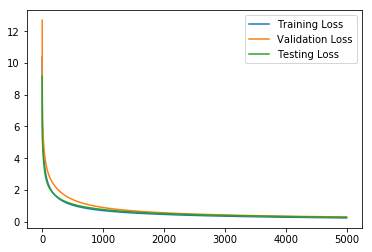

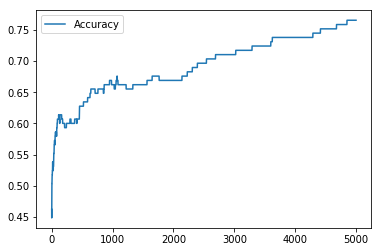

Final Training Loss: 0.2312903709951109
Final Validation Loss: 0.2899203256349182
Final Testing Loss: 0.2705368754891589
Final Testing Accuracy: 0.7655172413793103


In [5]:
alpha = 0.005
W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test)

##### (ii) $\alpha = 0.001$

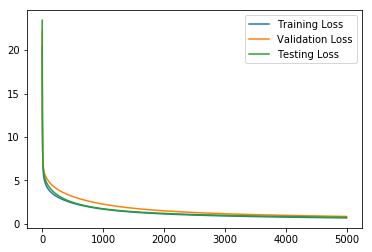

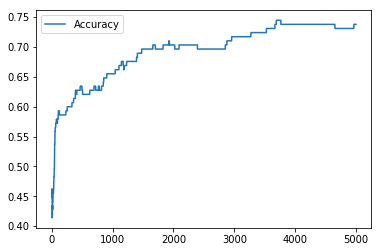

Final Training Loss: 0.6861726854739886
Final Validation Loss: 0.8553523784847674
Final Testing Loss: 0.7504632117894944
Final Testing Accuracy: 0.7379310344827587


In [6]:
alpha = 0.001

W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test)

##### (iii) $\alpha = 0.0001$

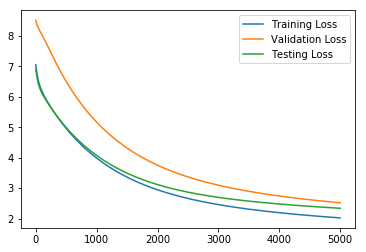

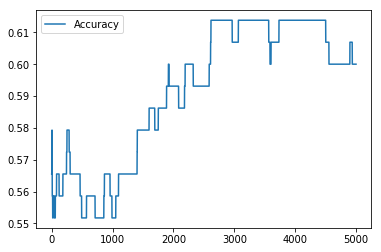

Final Training Loss: 2.0195464890126225
Final Validation Loss: 2.5156135645978255
Final Testing Loss: 2.3363107721546554
Final Testing Accuracy: 0.6


In [7]:
alpha = 0.0001

W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test)

#### 4. Generalization

In [8]:
alpha = 0.005

##### (i) $\lambda = 0.001$

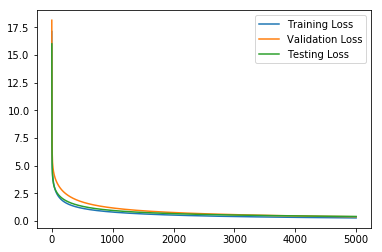

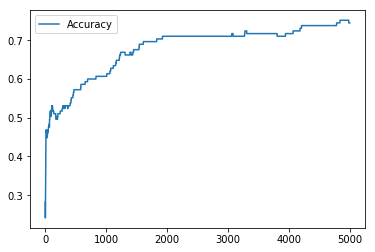

Final Training Loss: 0.2812954744345933
Final Validation Loss: 0.3863221803838099
Final Testing Loss: 0.41109555931384834
Final Testing Accuracy: 0.7448275862068966


In [9]:
reg = 0.001

W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test)

##### (ii) $\lambda = 0.1$

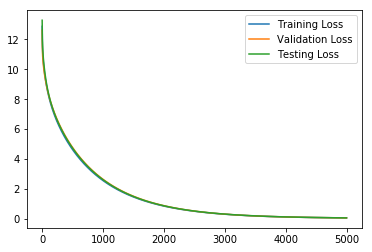

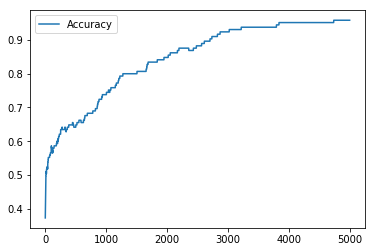

Final Training Loss: 0.05023288351788292
Final Validation Loss: 0.05069169748089014
Final Testing Loss: 0.05363450503640606
Final Testing Accuracy: 0.9586206896551724


In [10]:
reg = 0.1

W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test)

##### (iii) $\lambda = 0.5$

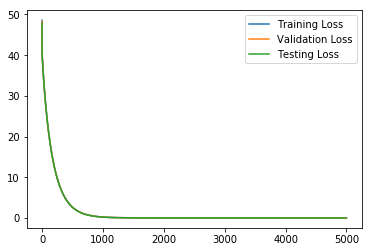

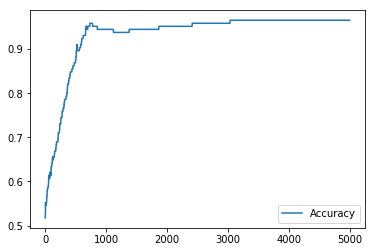

Final Training Loss: 0.020741343269142606
Final Validation Loss: 0.022879023022750435
Final Testing Loss: 0.021693619695950933
Final Testing Accuracy: 0.9655172413793104


In [11]:
reg = 0.5

W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test)

#### 5. Comparing Batch GD with normal equation

## 2. Logistic Regression

### 2.1 Binary cross-entropy loss

#### 1. Loss Function and Gradient

In [7]:
def crossEntropyLoss(W, b, x, y, reg):
    l_d = np.mean(np.log(1 + np.exp((1 - 2.*y) * (x@W + b)))) # y is of dtype uint8, requires upcast to prevent underflow
    l_w = reg / 2 * np.linalg.norm(W)**2
    l = l_d + l_w
    
    return l

def gradCE(W, b, x, y, reg):
    N = x.shape[0]
    const_vec = (1 - 2.*y) / (1 + np.exp((2.*y - 1) * (x@W + b)))
    grad_w = 1/N * (x.T @ const_vec) + reg*W
    grad_b = np.mean(const_vec)
    
    if (np.linalg.norm(grad_w) > 20 or grad_b > 20):
        print(grad_w, grad_b)

    return grad_w, grad_b

#### 2. Gradient Descent Implementation

In [6]:
def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test, lossType=None):
    if lossType is None:
        print("Please indicate desired loss type.")
        return
    
    loss_train = np.empty(epochs)
    loss_valid = np.empty(epochs)
    loss_test = np.empty(epochs)
    accuracy = np.empty(epochs)
    grad_w = np.empty(W.shape)
    grad_b = None
    last_iteration = epochs - 1
    for iteration in range(epochs):
        if lossType == "MSE":            
            grad_w, grad_b = gradMSE(W, b, x, y, reg)
            W -= alpha * grad_w
            b -= alpha * grad_b
            
            loss_train[iteration] = MSE(W, b, x, y, reg)
            loss_valid[iteration] = MSE(W, b, x_valid, y_valid, reg)
            loss_test[iteration] = MSE(W, b, x_test, y_test, reg)
            
            prediction_vec = (x_test @ W + b) > 0.5 # threshold: 0.5
            accuracy[iteration] = np.mean(prediction_vec == y_test)
        elif lossType == "CE":
            grad_w, grad_b = gradCE(W, b, x, y, reg)    
            W -= alpha * grad_w
            b -= alpha * grad_b         
            
            loss_train[iteration] = crossEntropyLoss(W, b, x, y, reg)
            loss_valid[iteration] = crossEntropyLoss(W, b, x_valid, y_valid, reg)
            loss_test[iteration] = crossEntropyLoss(W, b, x_test, y_test, reg)
            
            prediction_vec = 1 / (1 + np.exp(-(x_test@W + b))) > 0.5 # threshold: 0.5
            accuracy[iteration] = np.mean(prediction_vec == y_test)
        else:
            print("Please indicate a valid loss type: MSE / CE.")
            return
        
        # loss is close to minimum
        if (iteration is not 0) and abs(loss_train[iteration] - loss_train[iteration-1]) < error_tol:
            last_iteration = iteration
            print("Early exit at iteration", last_iteration)
            break

    plt.figure()
    plt.plot(loss_train[: last_iteration+1], label="Training Loss")
    plt.plot(loss_valid[: last_iteration+1], label="Validation Loss")
    plt.plot(loss_test[: last_iteration+1], label="Testing Loss")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(accuracy[: last_iteration+1], label="Accuracy")
    plt.legend()
    plt.show()
        
    print("Final Training Loss", loss_train[last_iteration])
    print("Final Validation Loss", loss_valid[last_iteration])
    print("Final Testing Loss", loss_test[last_iteration])
    print("Final Testing Accuracy:", accuracy[last_iteration])
    
    return W, b

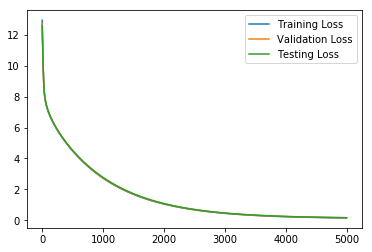

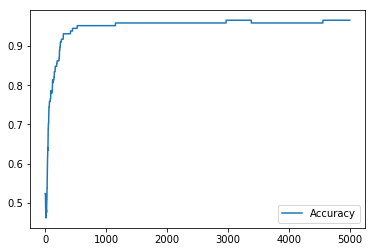

Final Training Loss 0.15856630498368626
Final Validation Loss 0.17068919365109067
Final Testing Loss 0.17294393132166463
Final Testing Accuracy: 0.9655172413793104


In [14]:
alpha = 0.005
reg = 0.1

W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test, "CE")

#### 3. Comparison to Linear Regression

In [15]:
alpha = 0.005
reg = 0.

##### Cross-Entropy Loss

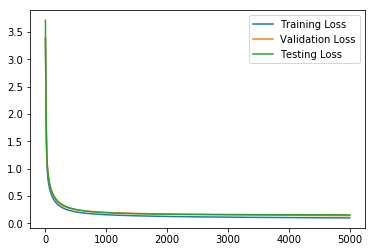

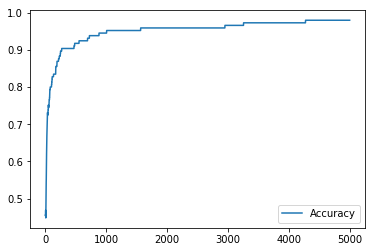

Final Training Loss 0.09644566704408593
Final Validation Loss 0.1371466440526272
Final Testing Loss 0.1526243672805394
Final Testing Accuracy: 0.9793103448275862


In [16]:
W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test, "CE")

##### MSE Loss

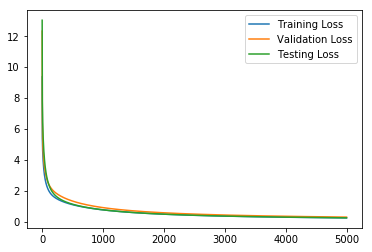

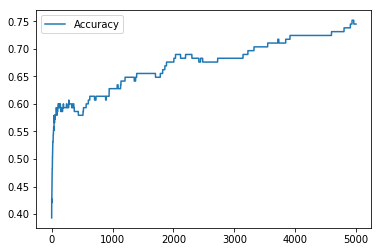

Final Training Loss 0.2398278471017039
Final Validation Loss 0.2922455780672203
Final Testing Loss 0.24660393107446485
Final Testing Accuracy: 0.7448275862068966


In [17]:
W = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5, size=(num_features, 1))
b = scipy.stats.truncnorm.rvs(a=-2, b=2, scale=0.5)
W, b = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_valid, y_valid, x_test, y_test, "MSE")

## 3. Batch Gradient Descent vs. SGD and Adam

### 3.1 SGD

#### 1. Building the Computational Graph

In [8]:
def buildGraph(beta1=None, beta2=None, epsilon=None, lossType=None, learning_rate=None):
    tf.set_random_seed(421)
    
    num_features = 28 * 28
    W_tf = tf.Variable(tf.random.truncated_normal([num_features, 1], stddev=0.5, dtype=tf.float64), name="W_tf")
    b_tf = tf.Variable(tf.random.truncated_normal([1], stddev=0.5, dtype=tf.float64), name="b_tf")
    
    x_tf = tf.placeholder(dtype=tf.float64, name="x_tf")
    y_tf = tf.placeholder(dtype=tf.float64, name="y_tf")
    reg_tf = tf.placeholder(dtype=tf.float64, name="reg_tf")
    
    loss_d_tf = None
    pred_tf = None
    if lossType == "MSE":
        pred_tf = tf.linalg.matmul(x_tf, W_tf) + b_tf
        loss_d_tf = tf.dtypes.cast(tf.losses.mean_squared_error(y_tf, pred_tf, weights=0.5), tf.float64)
    elif lossType == "CE":
        raw_pred_tf = tf.linalg.matmul(x_tf, W_tf) + b_tf
        pred_tf = tf.math.sigmoid(raw_pred_tf)
        loss_d_tf = tf.dtypes.cast(tf.losses.sigmoid_cross_entropy(y_tf, raw_pred_tf), tf.float64)
    else:
        print("Please indicate a valid loss type: MSE / CE.")
        return
    loss_w_tf = reg_tf * tf.nn.l2_loss(W_tf)
    loss_tf = loss_d_tf + loss_w_tf
    adam_optimizer_tf = tf.train.AdamOptimizer(learning_rate, beta1, beta2, epsilon)
    
    return W_tf, b_tf, x_tf, y_tf, pred_tf, reg_tf, loss_tf, adam_optimizer_tf

#### 2. Implementing Stochastic Gradient Descent

In [11]:
def sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType=None, beta1=0.9, beta2=0.999, epsilon=1e-08):
    if lossType is None:
        print("Please indicate desired loss type.")
        return

    W_tf, b_tf, x_tf, y_tf, pred_tf, reg_tf, loss_tf, adam_optimizer_tf = buildGraph(beta1, beta2, epsilon, lossType, alpha)
    training_op = adam_optimizer_tf.minimize(loss_tf)
    init = tf.initializers.global_variables()
    
    N = x.shape[0]
    num_features = x.shape[1]
    num_batches = N // minibatch_size 
    loss_train = np.empty(epochs)
    loss_valid = np.empty(epochs)
    loss_test = np.empty(epochs)
    accuracy = np.empty(epochs)
    last_iteration = epochs - 1
    W = np.empty((num_features, 1))
    b = None
    with tf.Session() as sess:
        init.run()
        index = np.arange(N)
        for iteration in range(epochs):
            shuffled_index = np.random.permutation(index)
            x_shuffled = x[shuffled_index]
            y_shuffled = y[shuffled_index]
            
            for batch_index in range(num_batches):
                start_index = batch_index * minibatch_size
                end_index = start_index + minibatch_size
                x_batch = x_shuffled[start_index : end_index]
                y_batch = y_shuffled[start_index : end_index]
                training_op.run(feed_dict={x_tf: x_batch, y_tf: y_batch, reg_tf: reg})
                        
            loss_train[iteration] = loss_tf.eval(feed_dict={x_tf: x_shuffled, y_tf: y_shuffled, reg_tf: reg})
            loss_valid[iteration] = loss_tf.eval(feed_dict={x_tf: x_valid, y_tf: y_valid, reg_tf: reg})
            loss_test[iteration] = loss_tf.eval(feed_dict={x_tf: x_test, y_tf: y_test, reg_tf: reg})
            
            prediction_vec = pred_tf.eval(feed_dict={x_tf: x_test}) > 0.5
            accuracy[iteration] = np.mean(prediction_vec == y_test)
            
            # loss is close to minimum
            if (iteration is not 0) and abs(loss_train[iteration] - loss_train[iteration-1]) < error_tol:
                last_iteration = iteration
                print("Early exit at iteration", last_iteration)
                break
        W = W_tf.eval()
        b = b_tf.eval()

    plt.figure()
    plt.plot(loss_train[: last_iteration+1], label="Training Loss")
    plt.plot(loss_valid[: last_iteration+1], label="Validation Loss")
    plt.plot(loss_test[: last_iteration+1], label="Testing Loss")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(accuracy[: last_iteration+1], label="Accuracy")
    plt.legend()
    plt.show()
        
    print("Final Training Loss", loss_train[last_iteration])
    print("Final Validation Loss", loss_valid[last_iteration])
    print("Final Testing Loss", loss_test[last_iteration])
    print("Final Testing Accuracy:", accuracy[last_iteration])
    
    return W, b

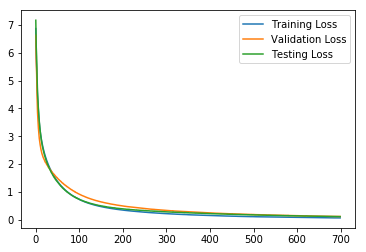

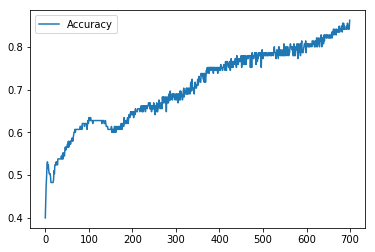

Final Training Loss 0.06310279667377472
Final Validation Loss 0.11431387066841125
Final Testing Loss 0.10979539155960083
Final Testing Accuracy: 0.8620689655172413


In [20]:
alpha = 0.001
epochs = 700
reg = 0
minibatch_size = 500
lossType = "MSE"

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType)

#### 3. Batch Size Investigation

##### (i) B = 100

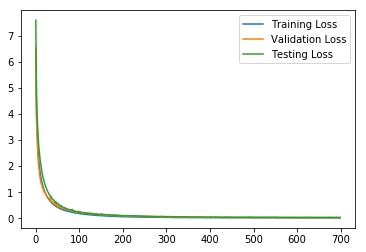

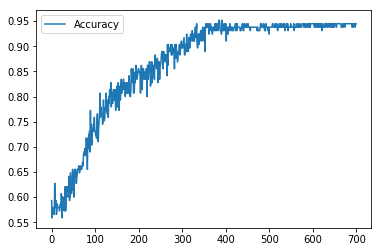

Final Training Loss 0.01352330669760704
Final Validation Loss 0.02338586002588272
Final Testing Loss 0.032337985932826996
Final Testing Accuracy: 0.9448275862068966


In [21]:
minibatch_size = 100

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType)

##### (ii) B = 700

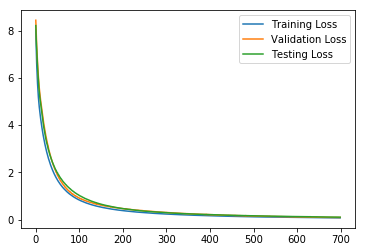

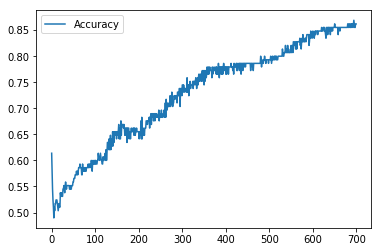

Final Training Loss 0.07153148949146271
Final Validation Loss 0.09193937480449677
Final Testing Loss 0.10253610461950302
Final Testing Accuracy: 0.8620689655172413


In [22]:
minibatch_size = 700

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType)

##### (iii) B = 1750

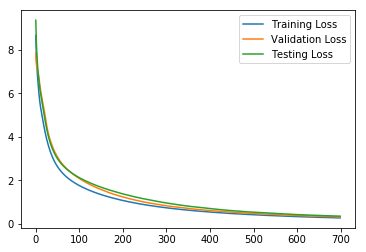

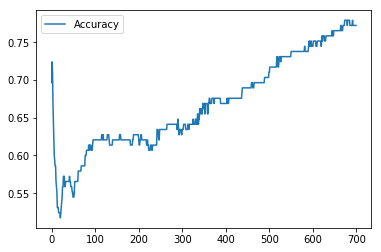

Final Training Loss 0.2623041868209839
Final Validation Loss 0.30765607953071594
Final Testing Loss 0.3437376618385315
Final Testing Accuracy: 0.7724137931034483


In [23]:
minibatch_size = 1750

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType)

#### 4. Hyperparameter Investigation

##### (a) i. $\beta_1 = 0.95$

In [24]:
alpha = 0.001
epochs = 700
minibatch_size = 500

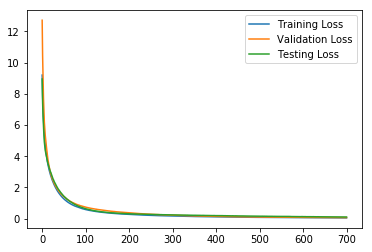

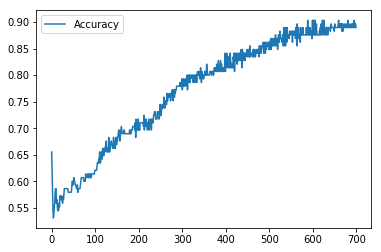

Final Training Loss 0.05005110055208206
Final Validation Loss 0.07026103883981705
Final Testing Loss 0.10923800617456436
Final Testing Accuracy: 0.8896551724137931


In [25]:
beta1 = 0.95

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, beta1=beta1)

##### (a) ii. $\beta_1 = 0.99$

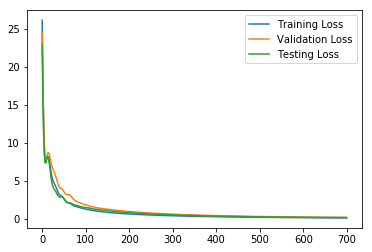

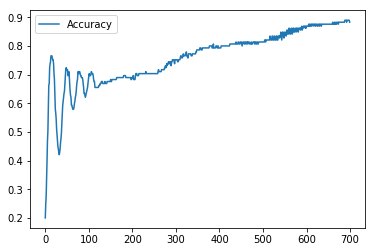

Final Training Loss 0.08732464909553528
Final Validation Loss 0.14536119997501373
Final Testing Loss 0.13446849584579468
Final Testing Accuracy: 0.8827586206896552


In [26]:
beta1 = 0.99

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, beta1=beta1)

##### (b) i. $\beta_2 = 0.99$

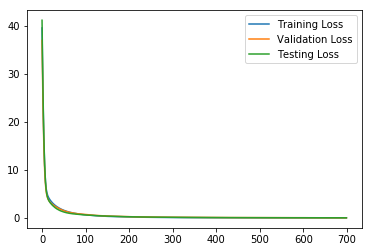

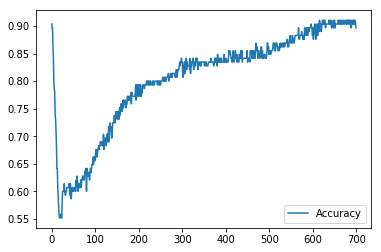

Final Training Loss 0.035715050995349884
Final Validation Loss 0.05989312753081322
Final Testing Loss 0.06312240660190582
Final Testing Accuracy: 0.896551724137931


In [27]:
beta2 = 0.99

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, beta2=beta2)

##### (b) ii. $\beta_2 = 0.9999$

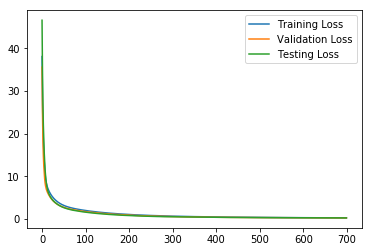

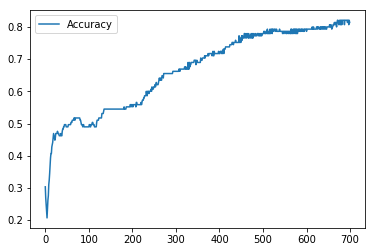

Final Training Loss 0.233356773853302
Final Validation Loss 0.2315235733985901
Final Testing Loss 0.23652562499046326
Final Testing Accuracy: 0.8137931034482758


In [28]:
beta2 = 0.9999

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, beta2=beta2)

##### (c) i. $\epsilon = 1e-9$

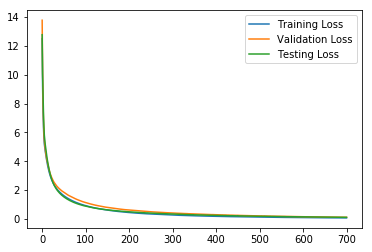

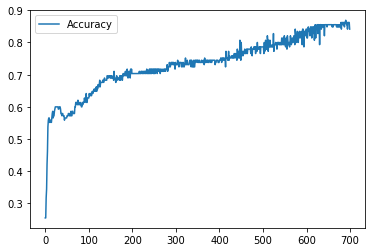

Final Training Loss 0.07002866268157959
Final Validation Loss 0.11542411148548126
Final Testing Loss 0.1091211661696434
Final Testing Accuracy: 0.8413793103448276


In [29]:
epsilon = 1e-9

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, epsilon=epsilon)

##### (c) ii. $\epsilon = 1e-4$

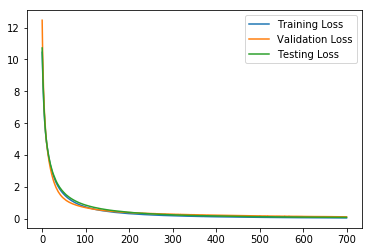

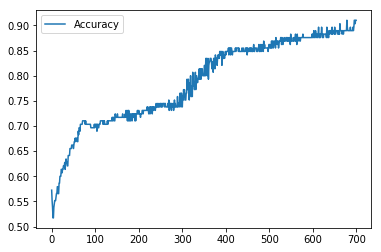

Final Training Loss 0.05183326452970505
Final Validation Loss 0.11965806782245636
Final Testing Loss 0.08576295524835587
Final Testing Accuracy: 0.9103448275862069


In [30]:
epsilon = 1e-4

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, epsilon=epsilon)

#### 5. Cross Entropy Loss Investigation

1.1830160333199373


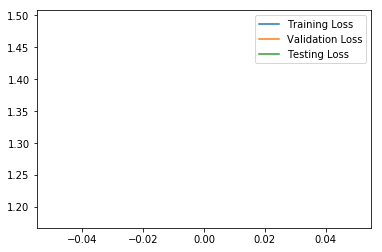

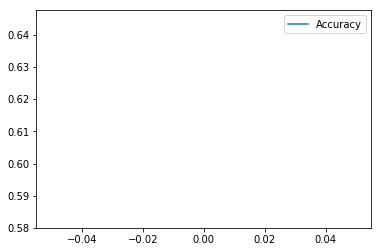

Final Training Loss 1.183016061782837
Final Validation Loss 1.4924957752227783
Final Testing Loss 1.2280888557434082
Final Testing Accuracy: 0.6137931034482759


In [12]:
alpha = 0.001
epochs = 1
reg = 0
minibatch_size = 500
lossType = "CE"

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType)

##### (i) B = 100

Early exit at iteration 223


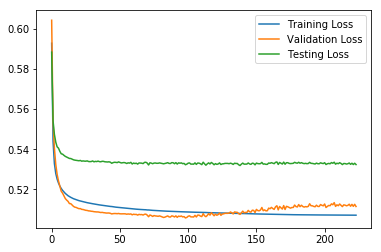

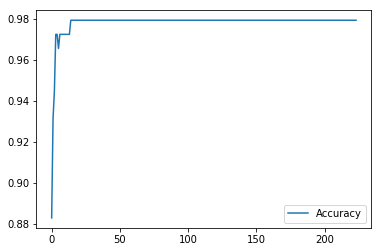

Final Training Loss 0.5071735978126526
Final Validation Loss 0.5115104913711548
Final Testing Loss 0.5323854684829712
Final Testing Accuracy: 0.9793103448275862


In [32]:
minibatch_size = 100

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType)

##### (ii) B = 700

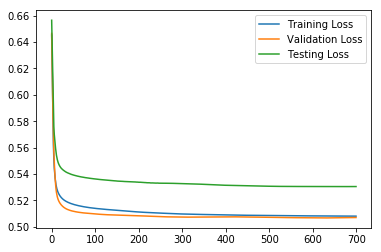

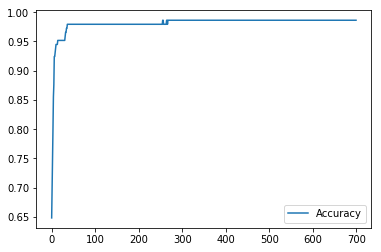

Final Training Loss 0.507967472076416
Final Validation Loss 0.5069147348403931
Final Testing Loss 0.5304293632507324
Final Testing Accuracy: 0.9862068965517241


In [33]:
minibatch_size = 700

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType)

##### (iii) B = 1750

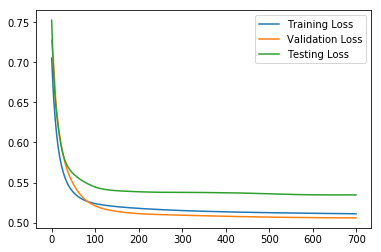

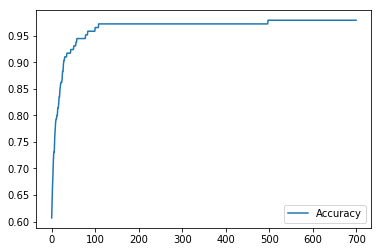

Final Training Loss 0.5109981298446655
Final Validation Loss 0.5058107376098633
Final Testing Loss 0.5345696806907654
Final Testing Accuracy: 0.9793103448275862


In [34]:
minibatch_size = 1750

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType)

In [35]:
alpha = 0.001
epochs = 700
minibatch_size = 500

##### (a) i. $\beta_1 = 0.95$

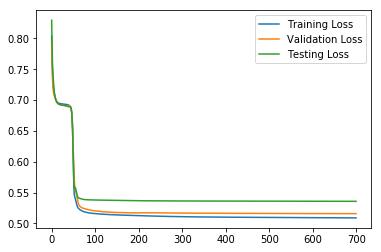

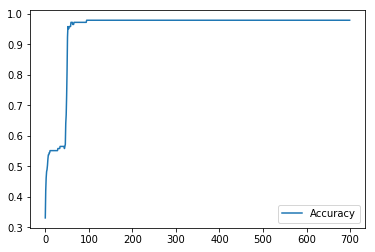

Final Training Loss 0.5089435577392578
Final Validation Loss 0.5158773064613342
Final Testing Loss 0.5358436107635498
Final Testing Accuracy: 0.9793103448275862


In [36]:
beta1 = 0.95

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, beta1=beta1)

##### (a) ii. $\beta_1 = 0.99$

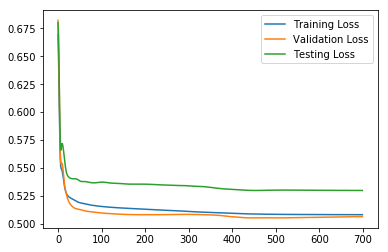

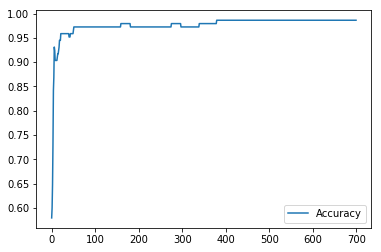

Final Training Loss 0.5082343816757202
Final Validation Loss 0.5065284967422485
Final Testing Loss 0.5299017429351807
Final Testing Accuracy: 0.9862068965517241


In [37]:
beta1 = 0.99

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, beta1=beta1)

##### (b) i. $\beta_2 = 0.99$

Early exit at iteration 487


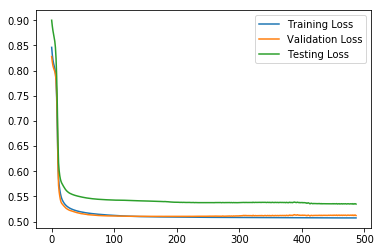

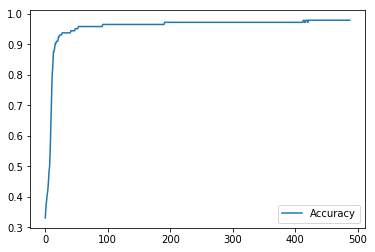

Final Training Loss 0.5071409940719604
Final Validation Loss 0.5118733048439026
Final Testing Loss 0.5345761775970459
Final Testing Accuracy: 0.9793103448275862


In [38]:
beta2 = 0.99

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, beta2=beta2)

##### (b) ii. $\beta_2 = 0.9999$

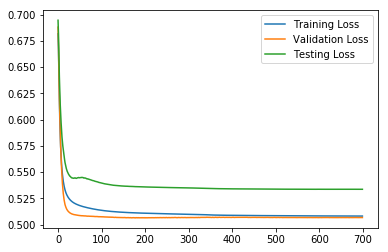

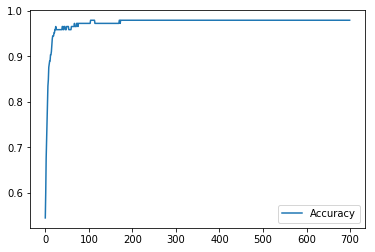

Final Training Loss 0.5080336332321167
Final Validation Loss 0.5066166520118713
Final Testing Loss 0.5335656404495239
Final Testing Accuracy: 0.9793103448275862


In [39]:
beta2 = 0.9999

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, beta2=beta2)

##### (c) i. $\epsilon = 1e-9$

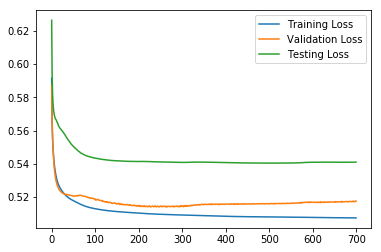

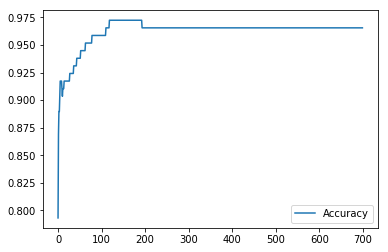

Final Training Loss 0.5074904561042786
Final Validation Loss 0.5175689458847046
Final Testing Loss 0.5410747528076172
Final Testing Accuracy: 0.9655172413793104


In [40]:
epsilon = 1e-9

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, epsilon=epsilon)

##### (c) ii. $\epsilon = 1e-4$

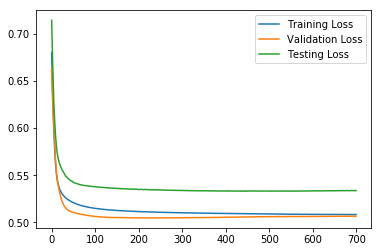

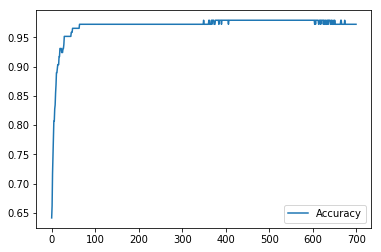

Final Training Loss 0.5083022713661194
Final Validation Loss 0.5065768361091614
Final Testing Loss 0.5337374806404114
Final Testing Accuracy: 0.9724137931034482


In [41]:
epsilon = 1e-4

W, b = sgd_adam(x, y, alpha, epochs, reg, x_valid, y_valid, x_test, y_test, minibatch_size, lossType, epsilon=epsilon)